In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams['figure.dpi']=300
plt.rcParams['figure.figsize']=(10,6)

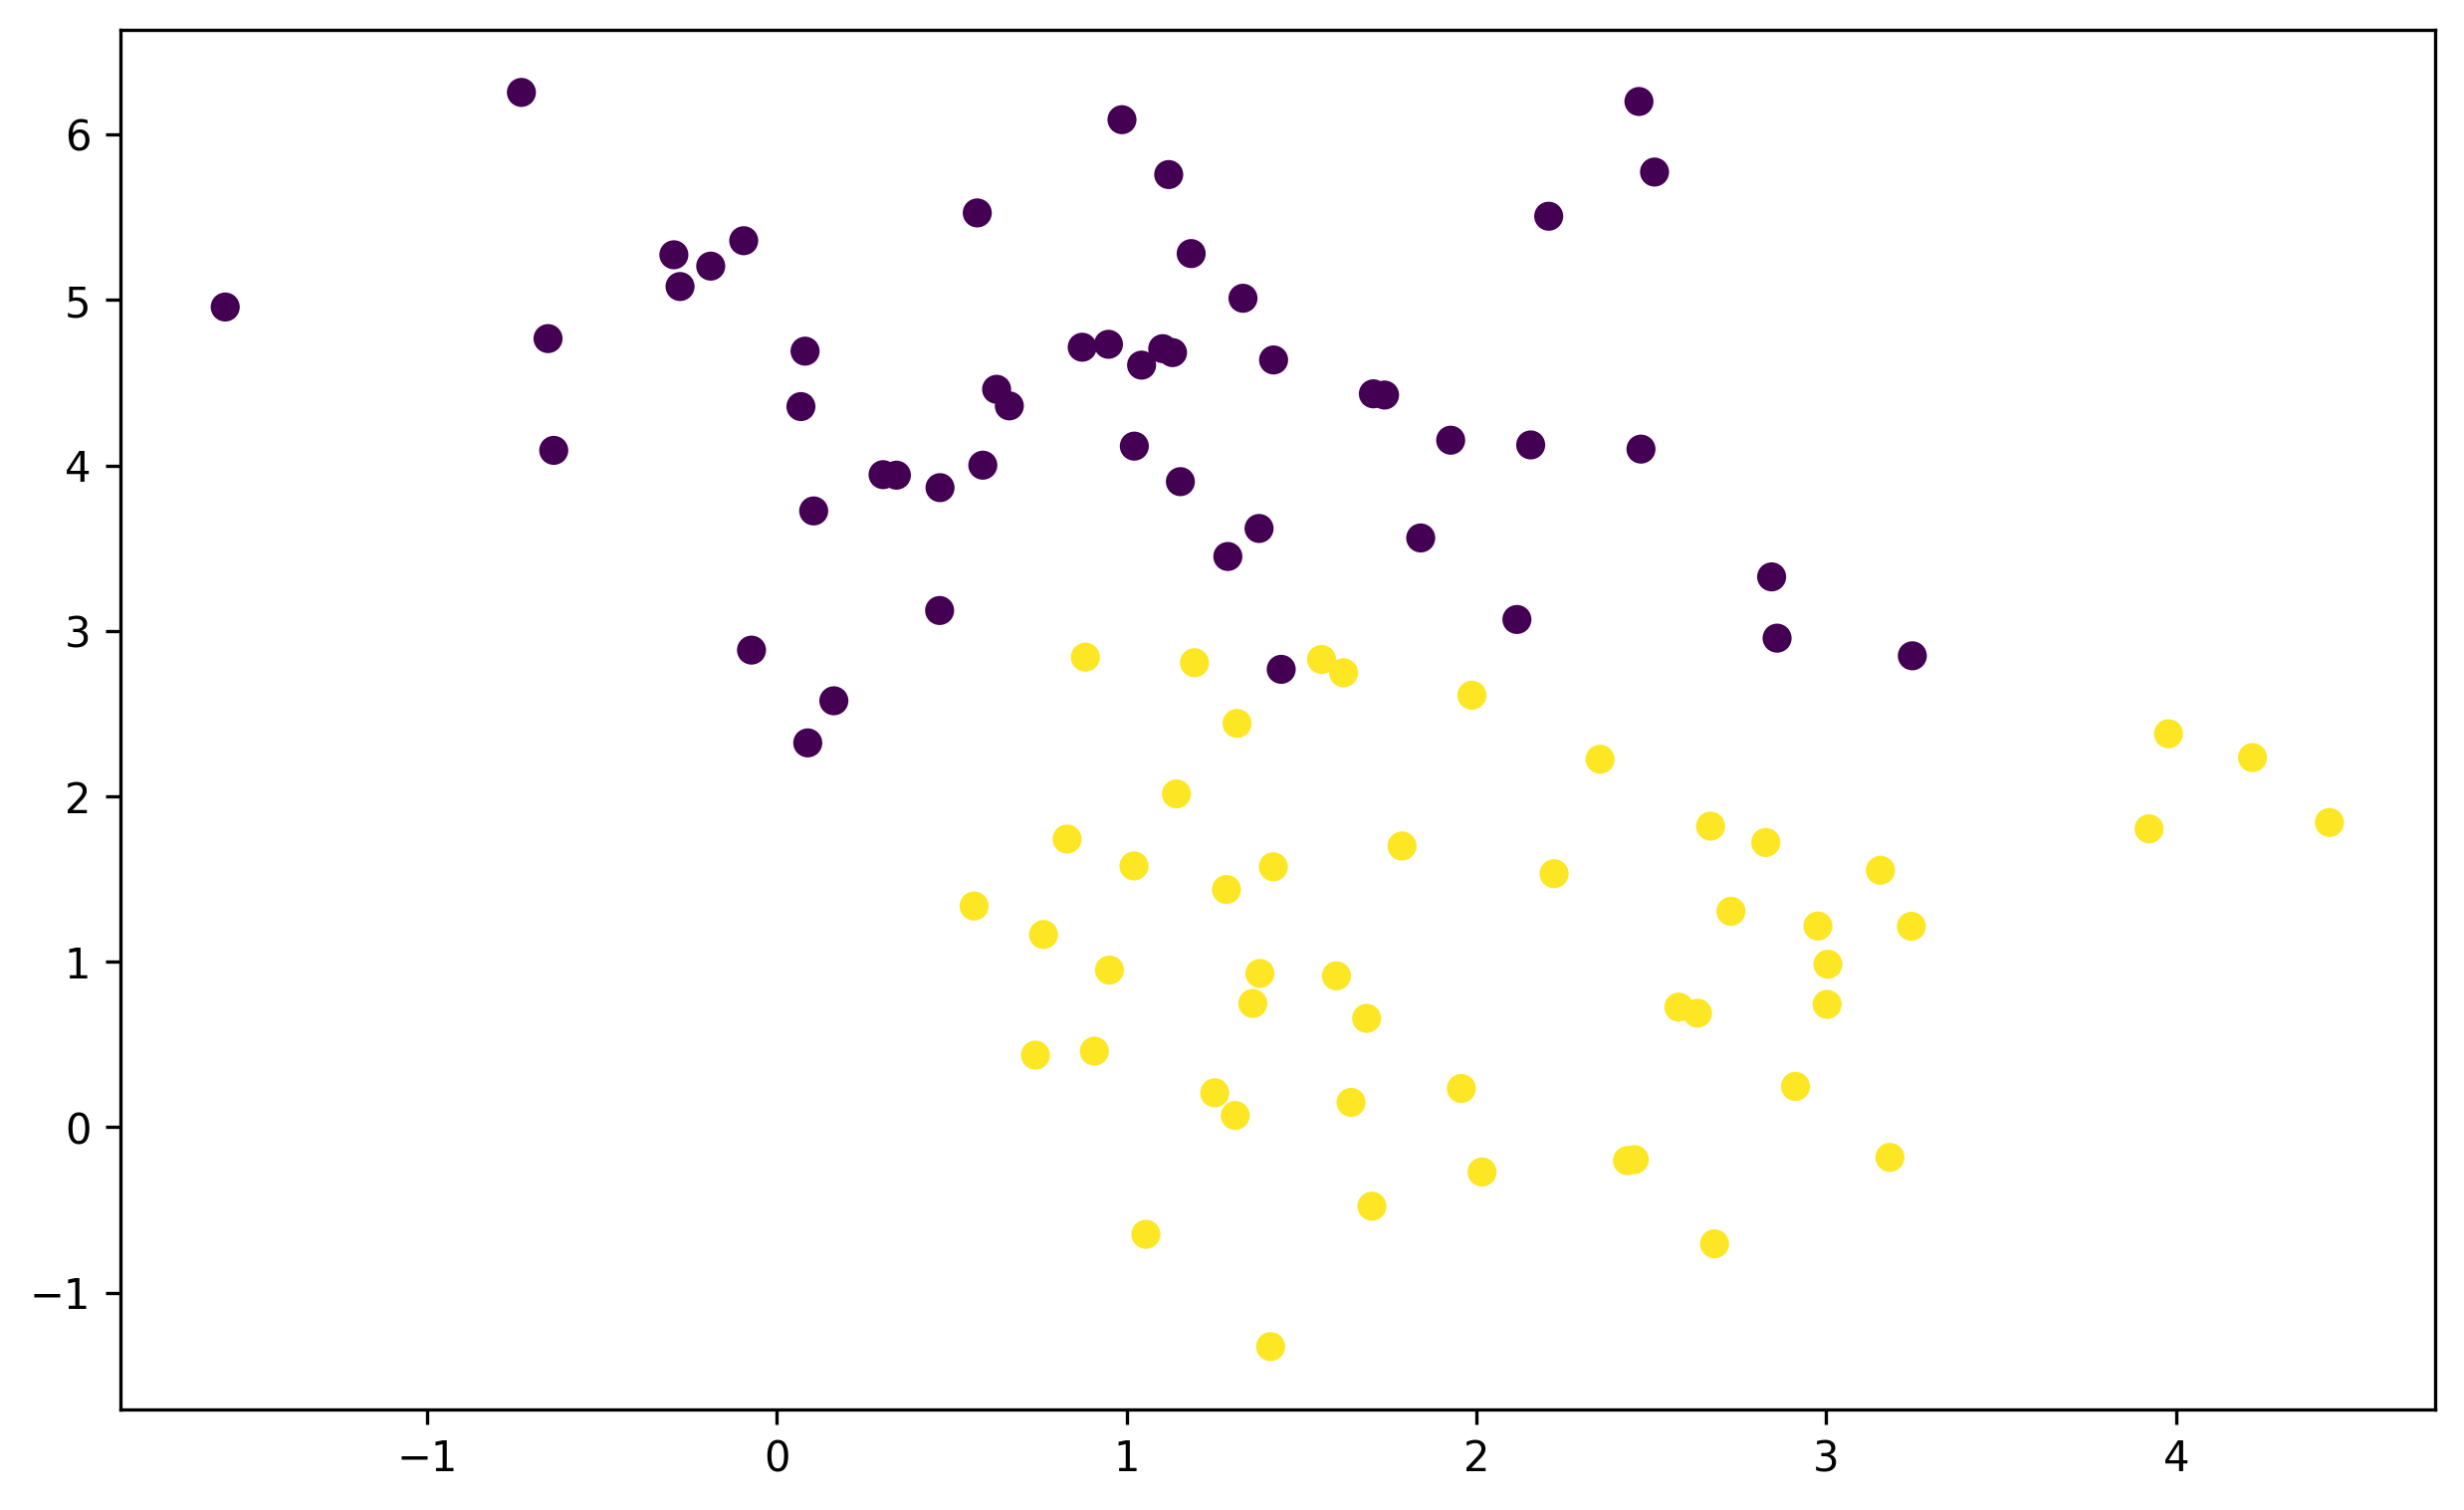

In [22]:
X,y =make_blobs(n_samples=100, centers=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y) #tutti ip unti della prima feature[0] e della seconda [1]

Abbiamo due grossi cluster di punti, parziamente sovrapposti.

In [3]:
C=1.0 #parametro di regolarizzazione dell'svm
#stiamo forzando python a trasformare un numero float in un numero con la virgola

svc=svm.SVC(kernel="linear",C=C, probability=True).fit(X,y) #probability=True permette di richiamare predict.proba
rbf_svc=svm.SVC(kernel="rbf",C=C, gamma=0.7).fit(X,y)
poly_svc=svm.SVC(kernel="poly",C=C, degree=3).fit(X,y)
lin_svc=svm.LinearSVC(C=C).fit(X,y)

h=.02 #quale è la risoluzione del sistema di coordinate, scala graduata

/Users/uffa/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [4]:
b=[
    [-1,5],
    [1,2],
    [1,3]
]
#predict.proba
#restituisce le probabilità per ogni singola predizione effettuata per ogni classe
proba=svc.predict_proba(b) #restituisce le probabilità sui cui verrà applicato il softmax e calcolatele classi
predictions=svc.predict(b) #per memorizzare le classi di uscita (predizioni)
dec_function=svc.decision_function(b) #restituisce il valore grezzo prima che esso venga dato in pasto al predict_proba 

for i in range(0, len(b)):
    print(f"{dec_function[i]}, proba: {proba[i]}->{predictions[i]}")

-4.960648524769267, proba: [0.99861549 0.00138451]->0
0.9935161360064027, proba: [0.18417798 0.81582202]->1
-0.834986264278708, proba: [0.72917531 0.27082469]->0


il primo è in valore assoluto maggiore di 1 infatti è nettamente oltre il margine. 
[0.99899853 0.00100147] sono le probabilità di ottenere l'una o l'altra classe.
Gli altri due sono molto vicini ma ancora fuori dal margine.

meshgrid prende due vettori monodimensionali e riceve indietro due matrici con numero di elementi pari al numero delle dimensioni nello spazio formato dalle coordinate di quei due vettori.

La funzione permette di creare un girglia a partire da due vettori, ne calcola il prodotto cartesiano.

In [7]:
x=np.arange(-2,3,1) #lista monodimensionale che va da meno due a 2 (3 non compreso), con salti di 1
y=np.arange(-1,2,1)
print(x)
print(y)


[-2 -1  0  1  2]
[-1  0  1]


vado a utilizzare i due vettori insieme alla meshgreed per ottenere una combinazione dei due vettori che mi restituirà ogni punto possibile nello spazio creato dai due vettori, nell'asse x e nell'asse y.

In [8]:
xx, yy=np.meshgrid(x,y)

print(xx)
print(yy)

[[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]
[[-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]]


<function matplotlib.pyplot.show(close=None, block=None)>

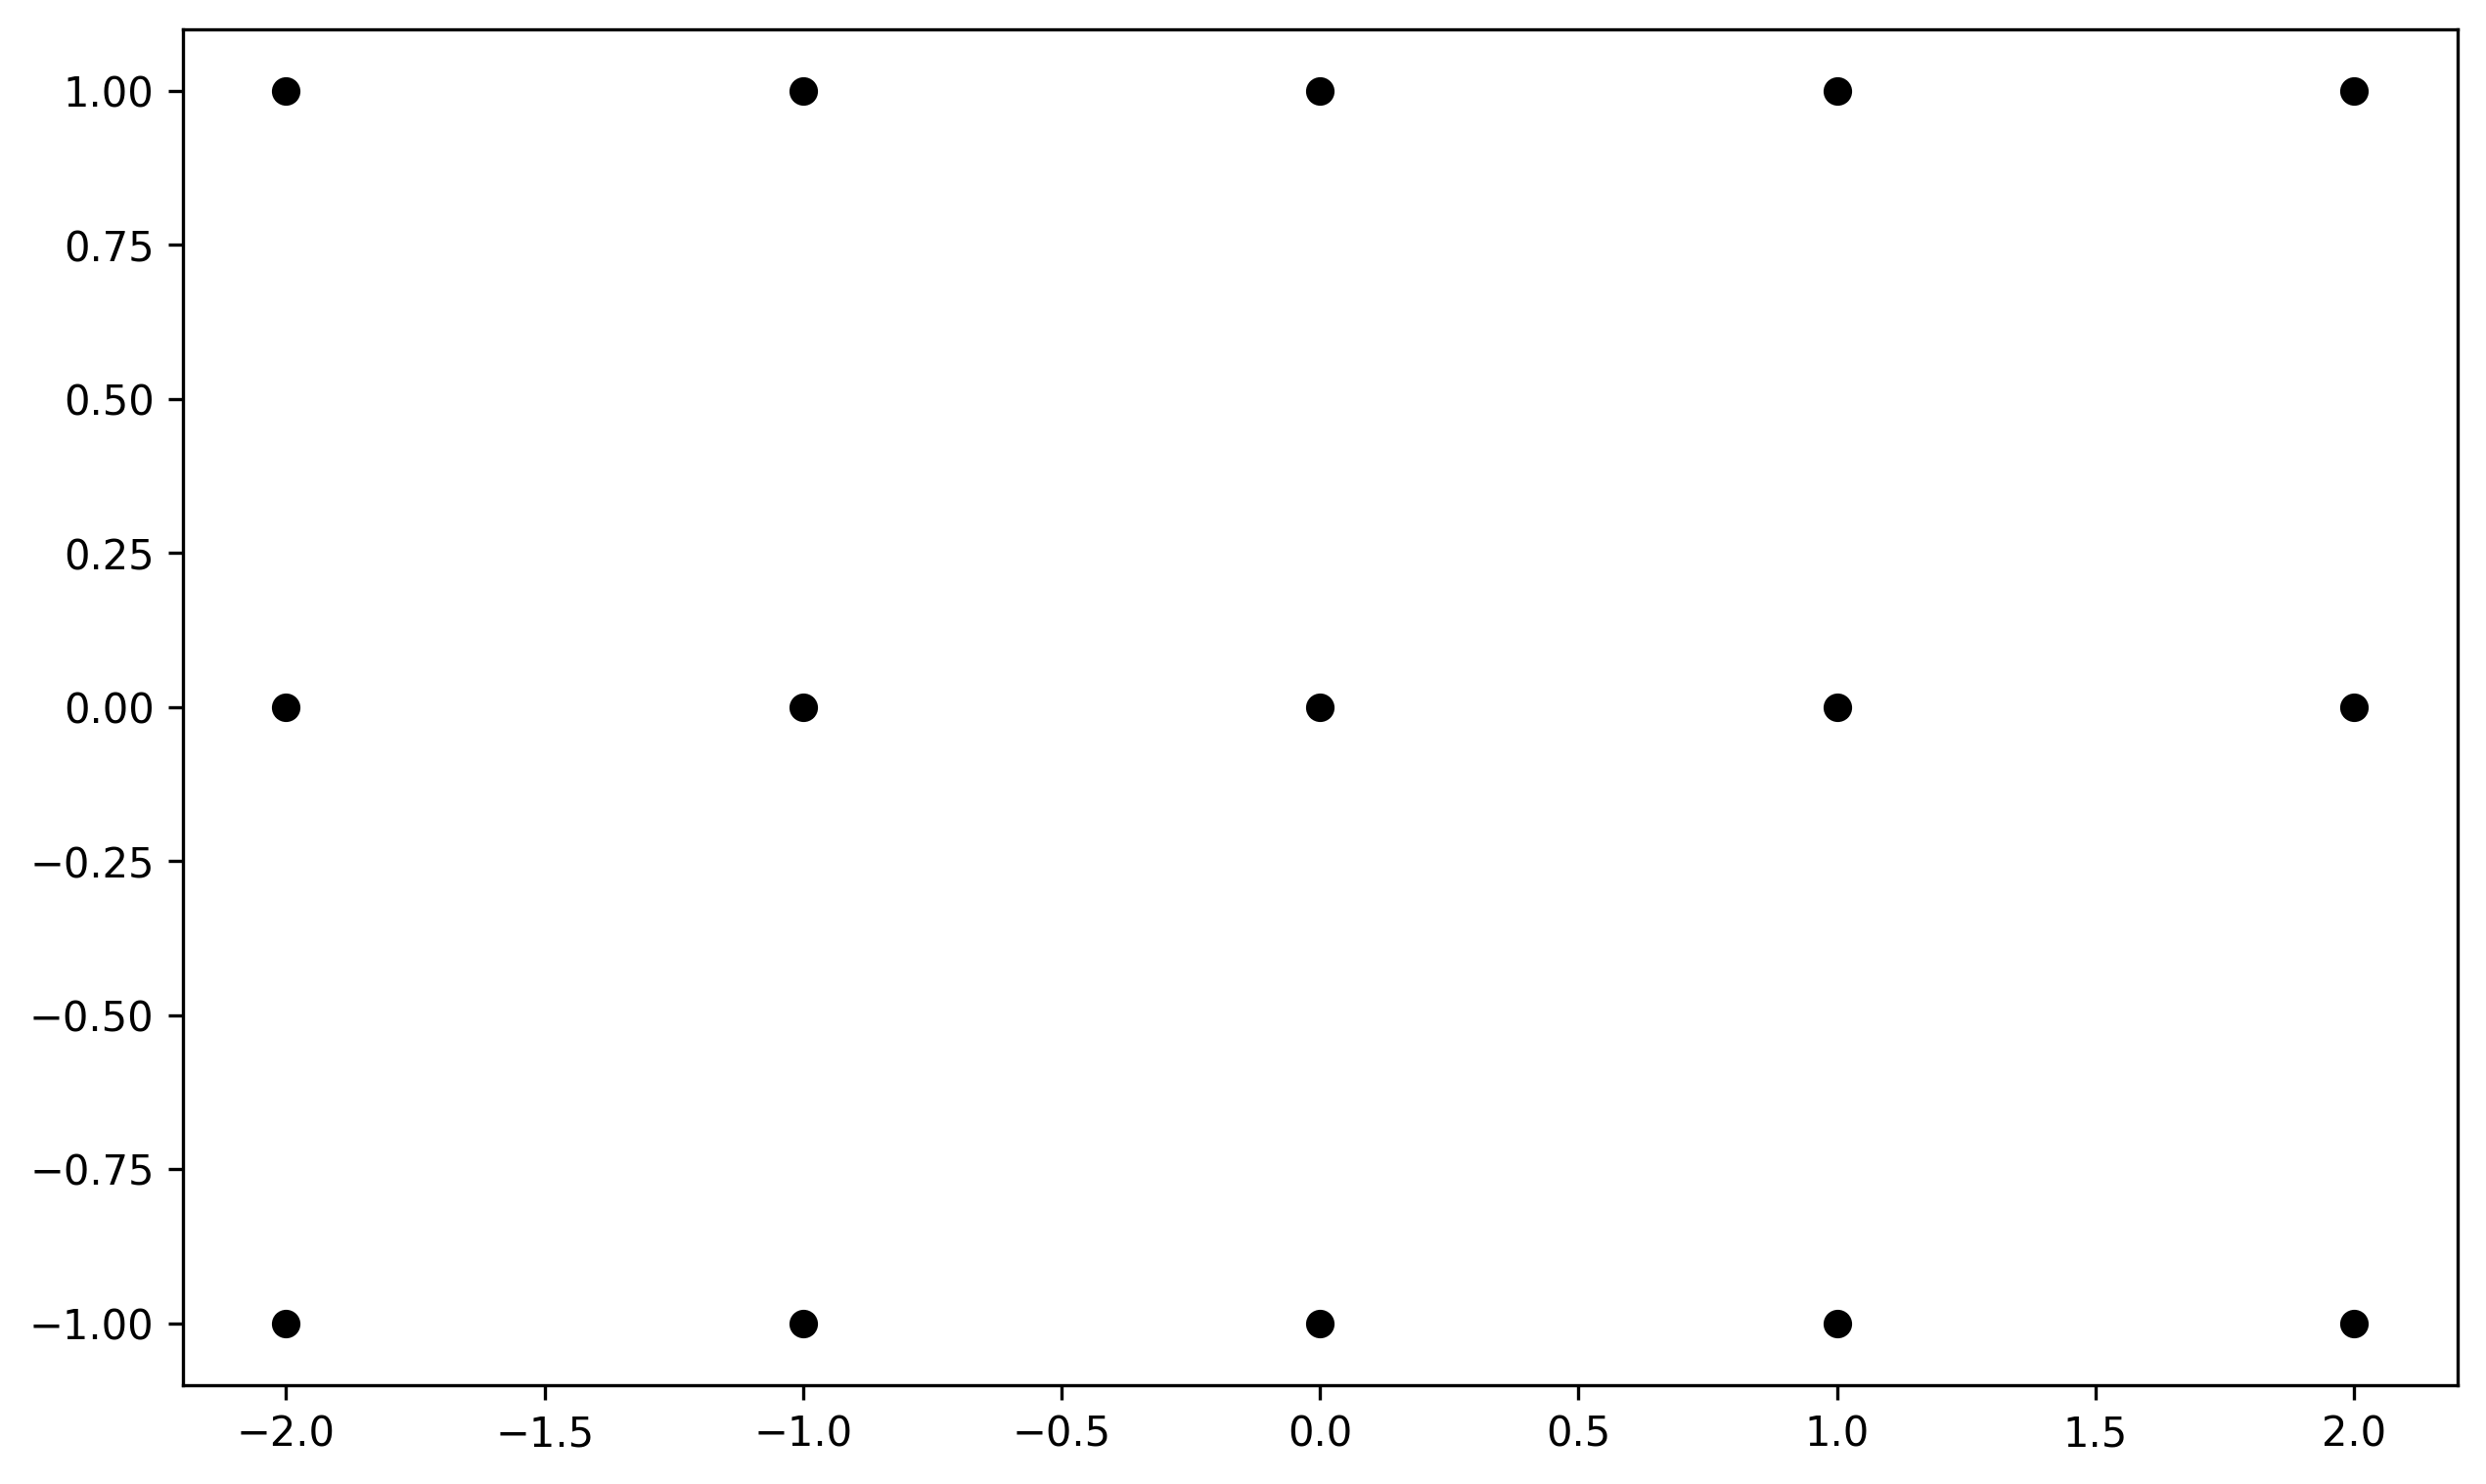

In [9]:
plt.plot(xx,yy, marker="o",color="k", linestyle="none")
plt.show

In [10]:
zz=np.square(xx)+np.square(yy)
#per disegnare un contour plot
print(zz)

[[5 2 1 2 5]
 [4 1 0 1 4]
 [5 2 1 2 5]]


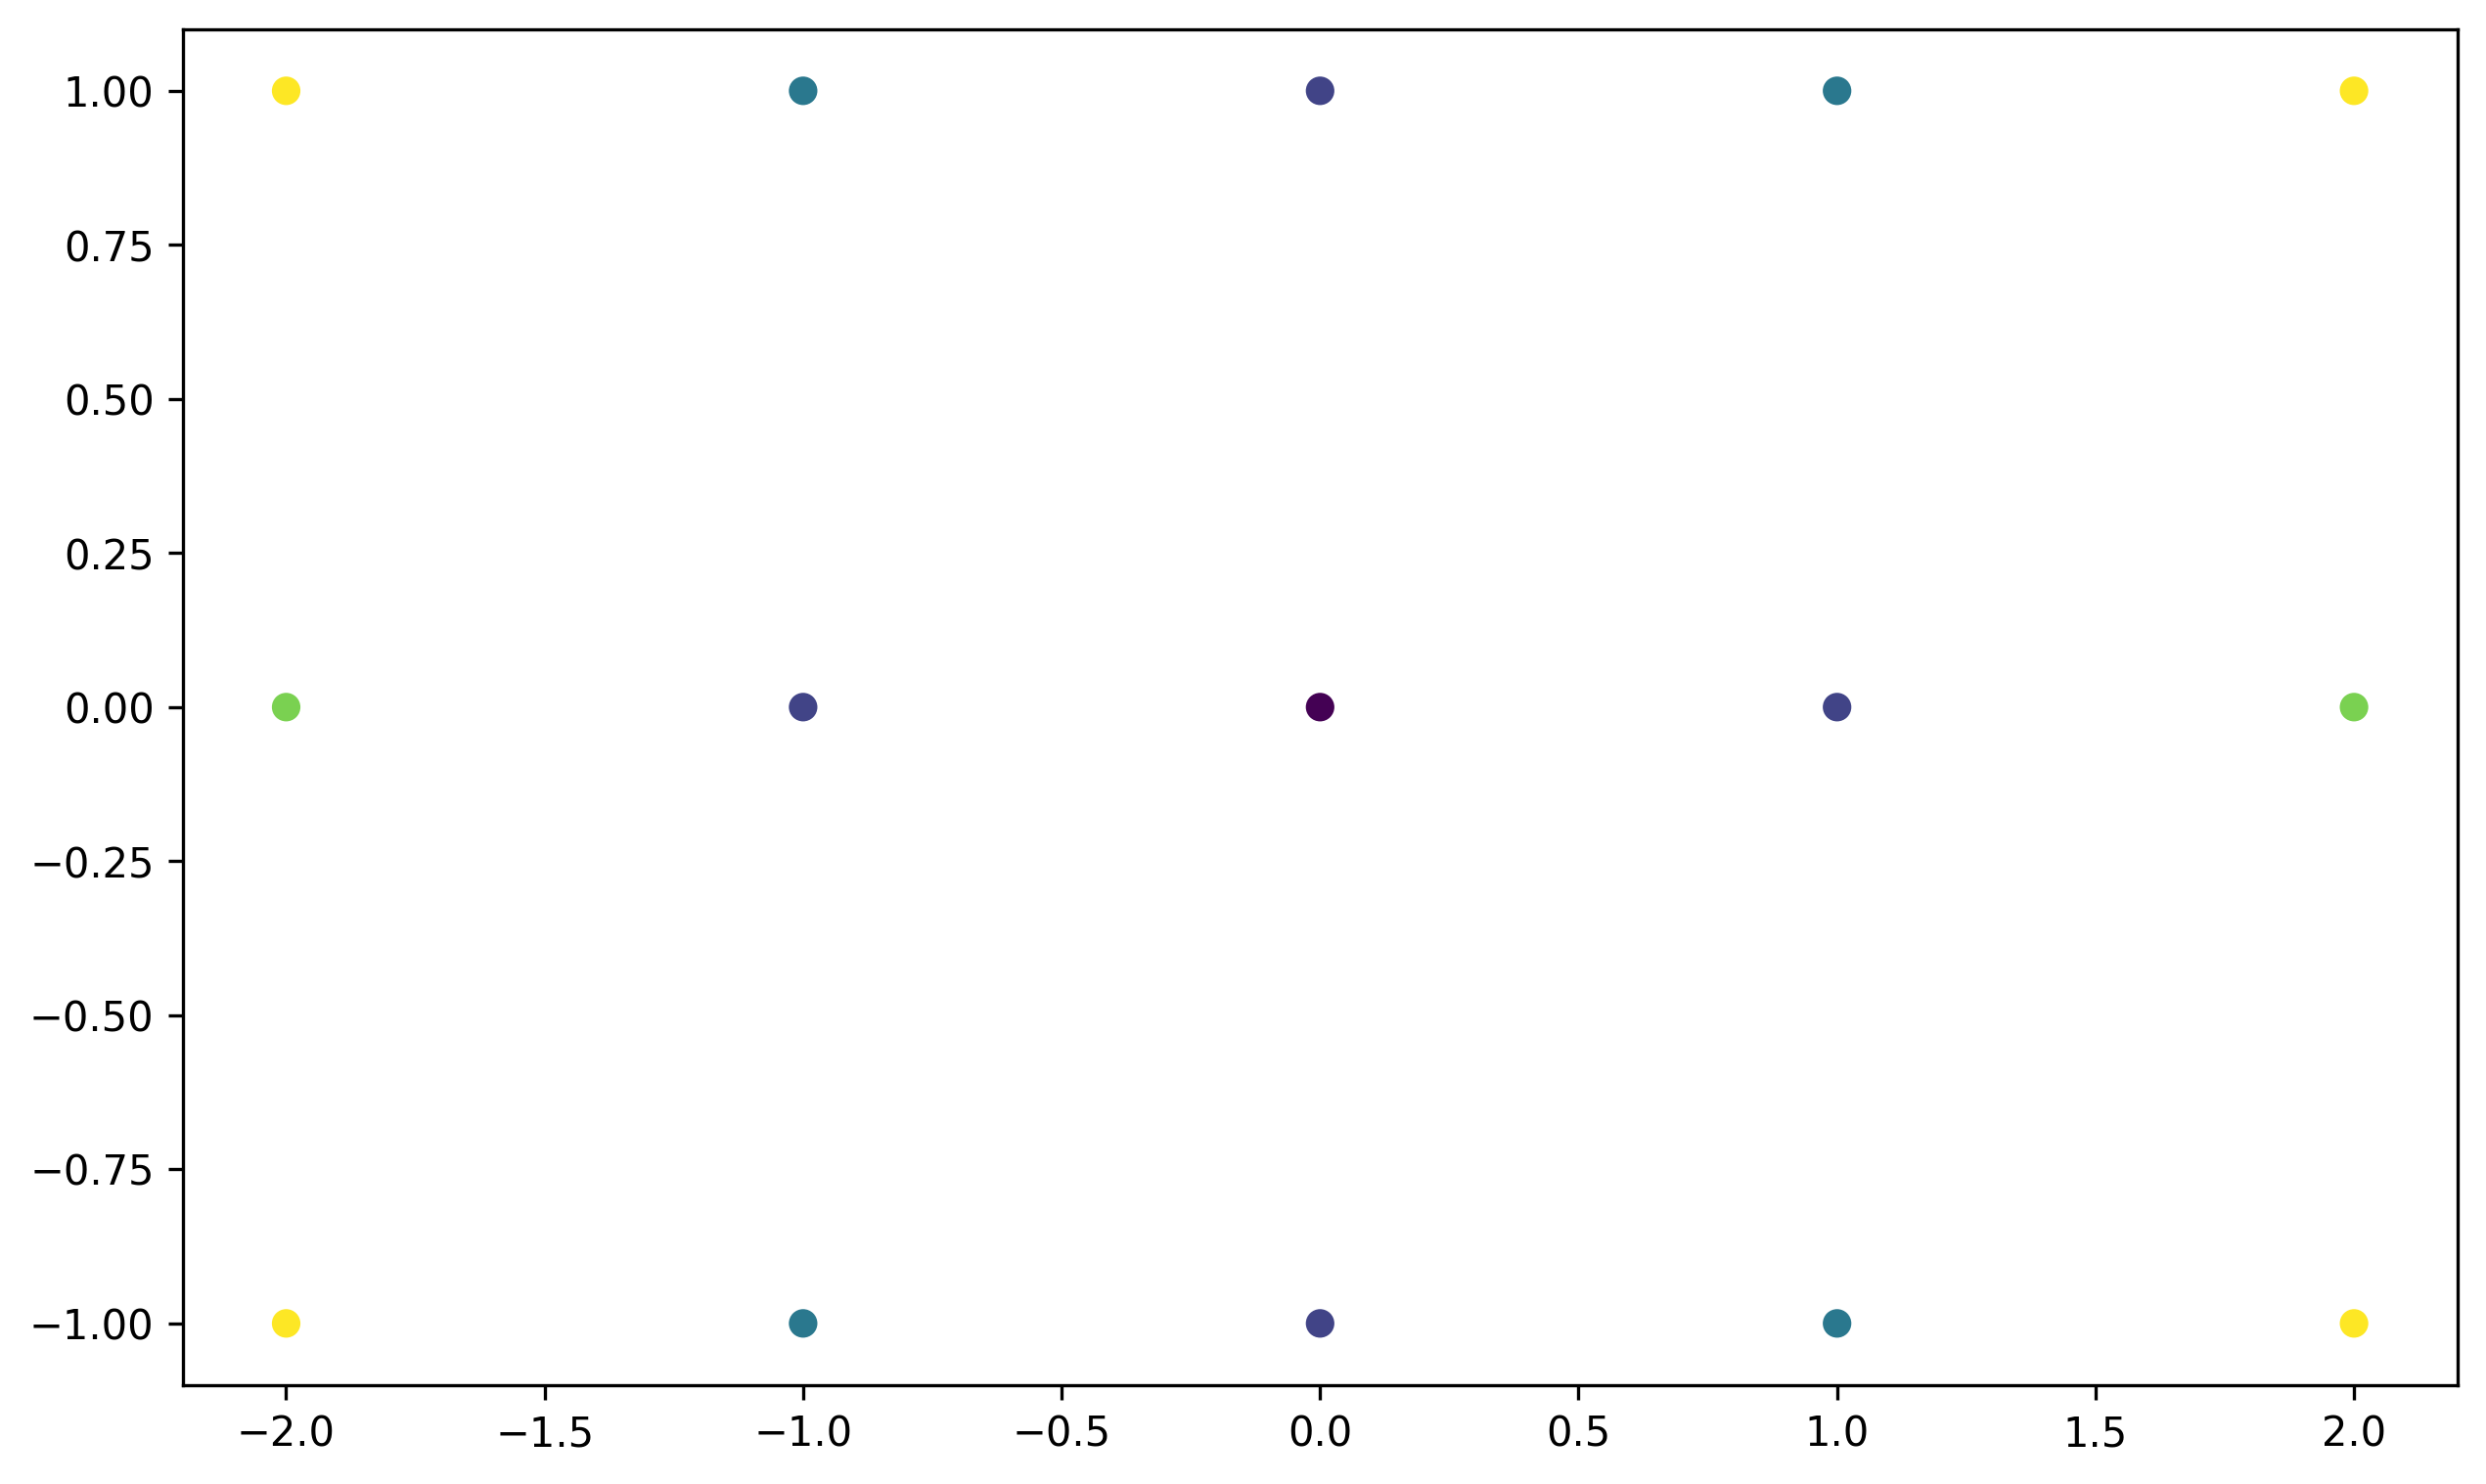

In [11]:
plt.scatter(xx,yy,c=zz)
plt.show()

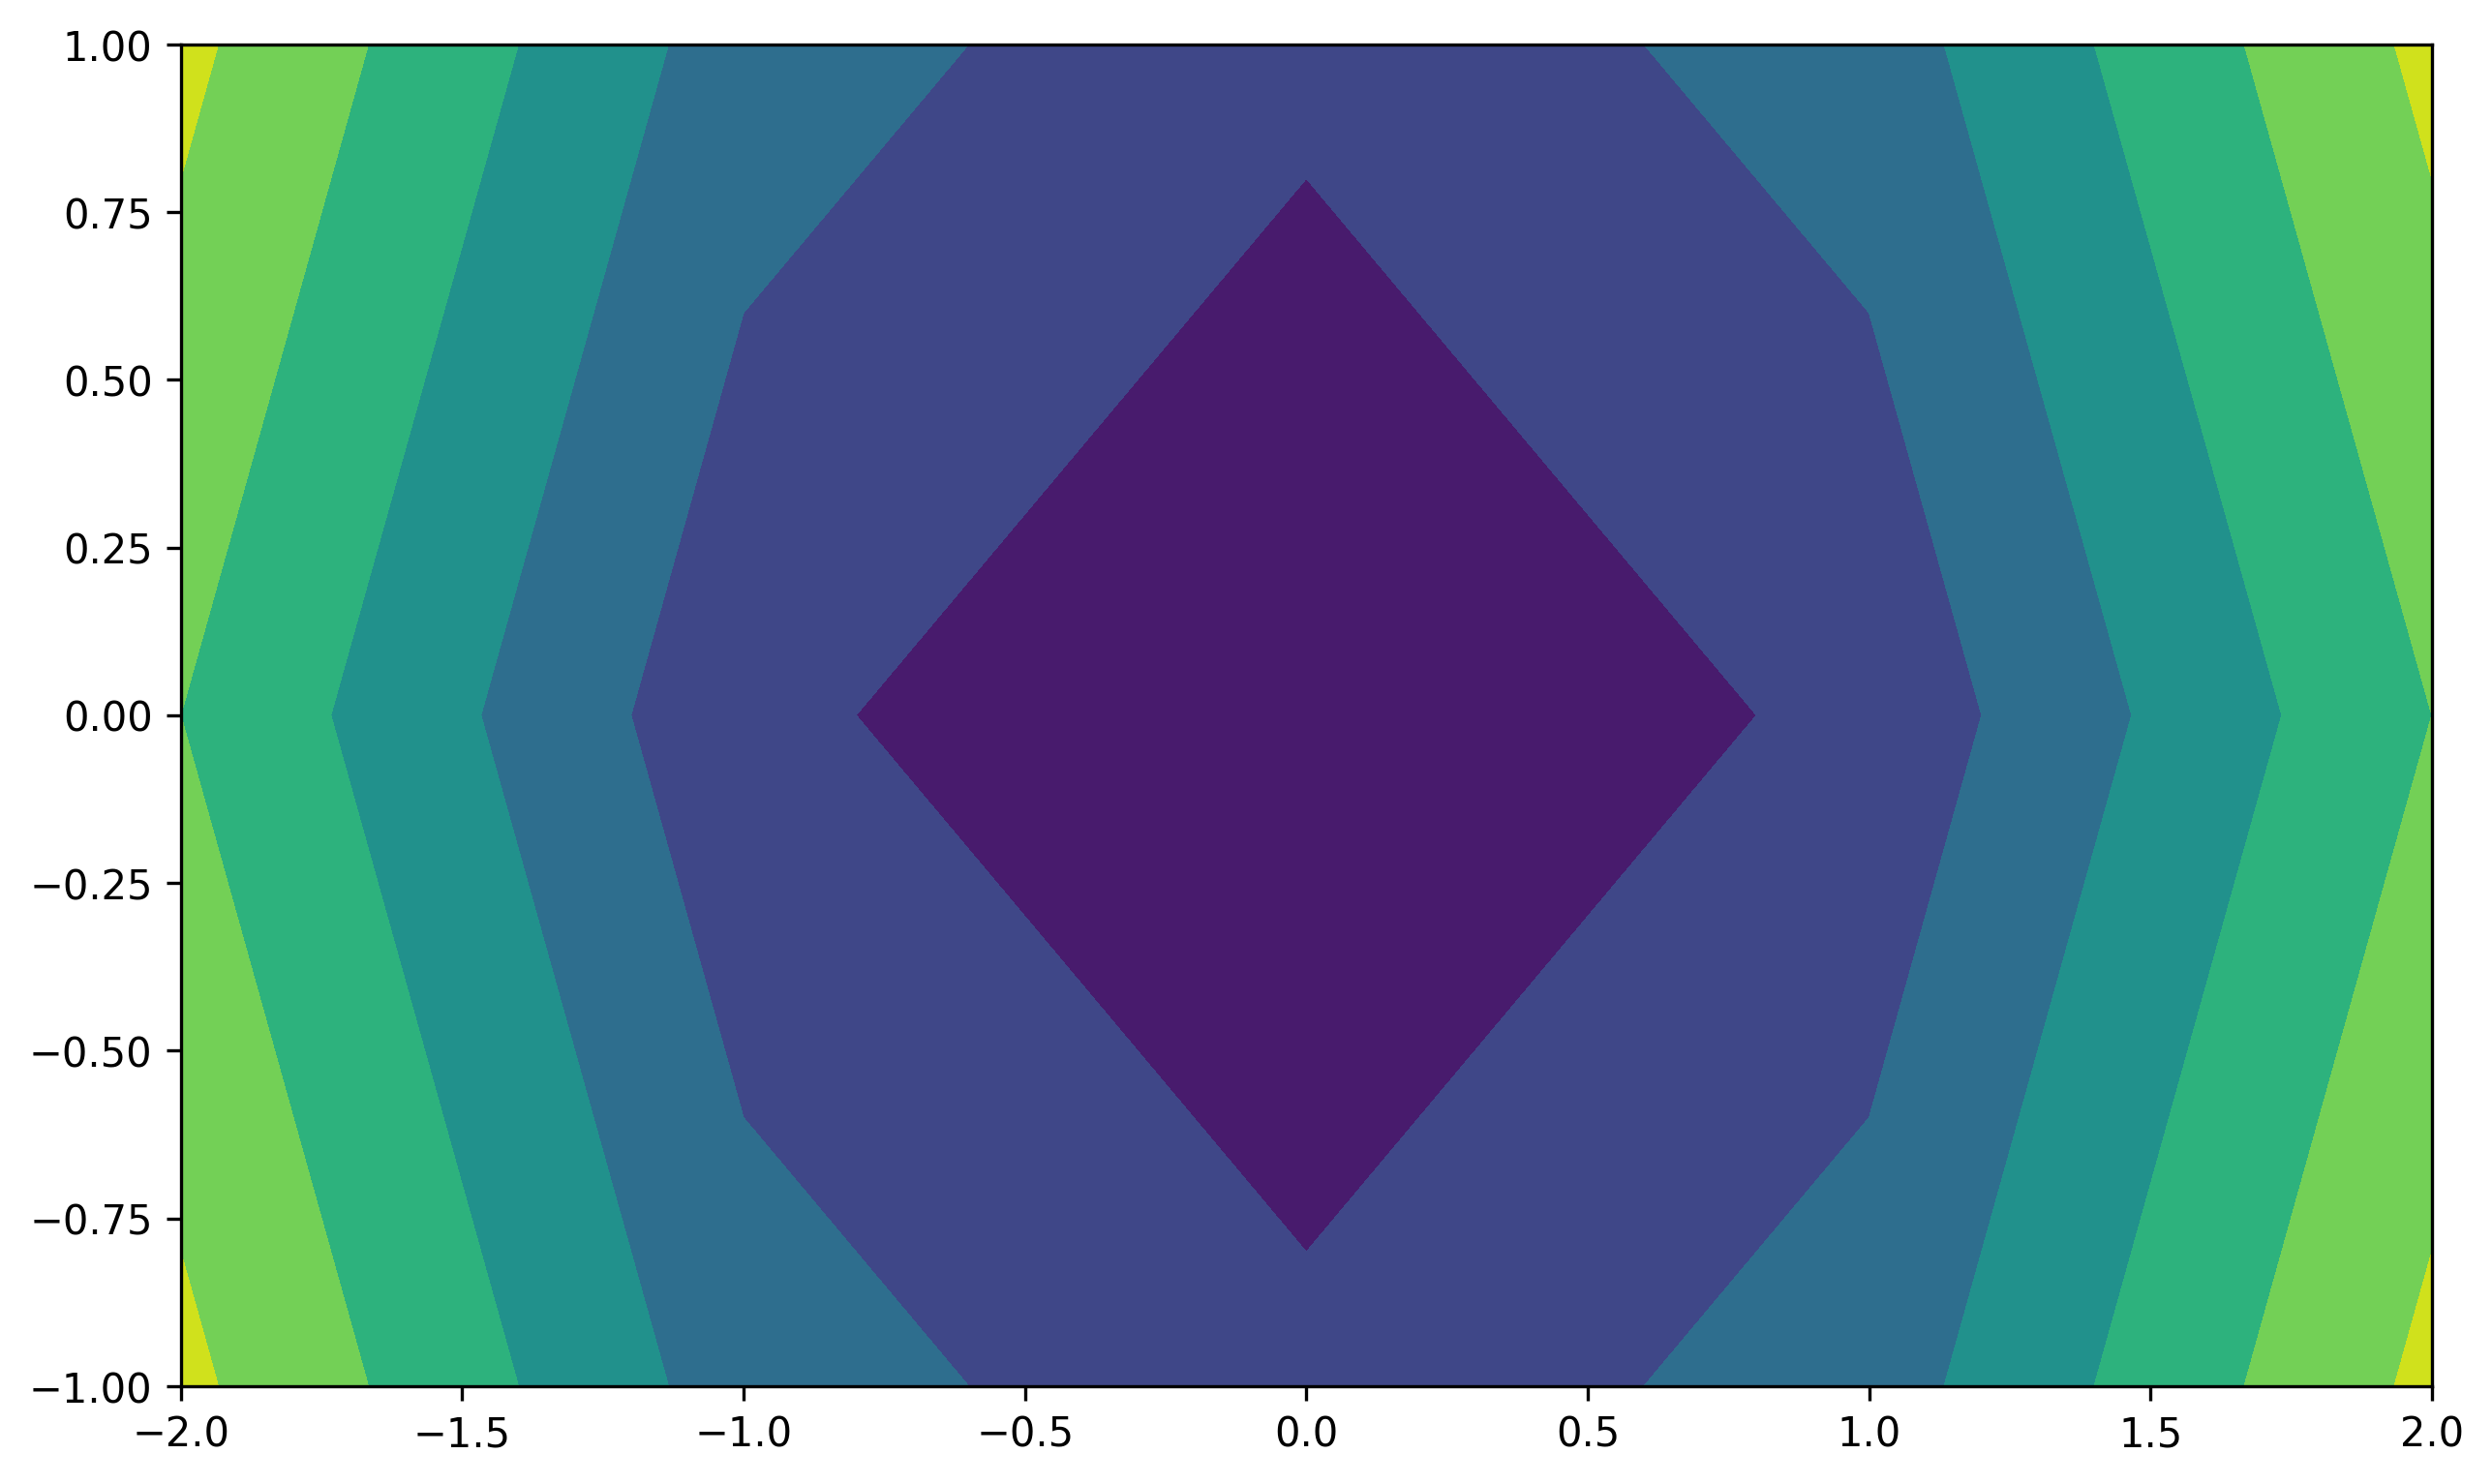

In [12]:
plt.contourf(xx,yy,zz)
plt.show()

In [15]:
#creiamo il batch da dare in pasto al classificatore
xx,yy= np.meshgrid(
    np.arange(-5,6,1),
    np.arange(-2,3,1)
)
xx.ravel() #array monodimensionale basato sulla matrice appena creata

#c_concatena all'interno di una struttra dati unica, le liste che diamo come argomenti
batch=np.c_[xx.ravel(),yy.ravel()]
print(batch.shape) #le due colonne sono le features

(55, 2)


In [16]:
predictions=svc.predict(batch)
print(predictions.shape)
print(predictions)

(55,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]


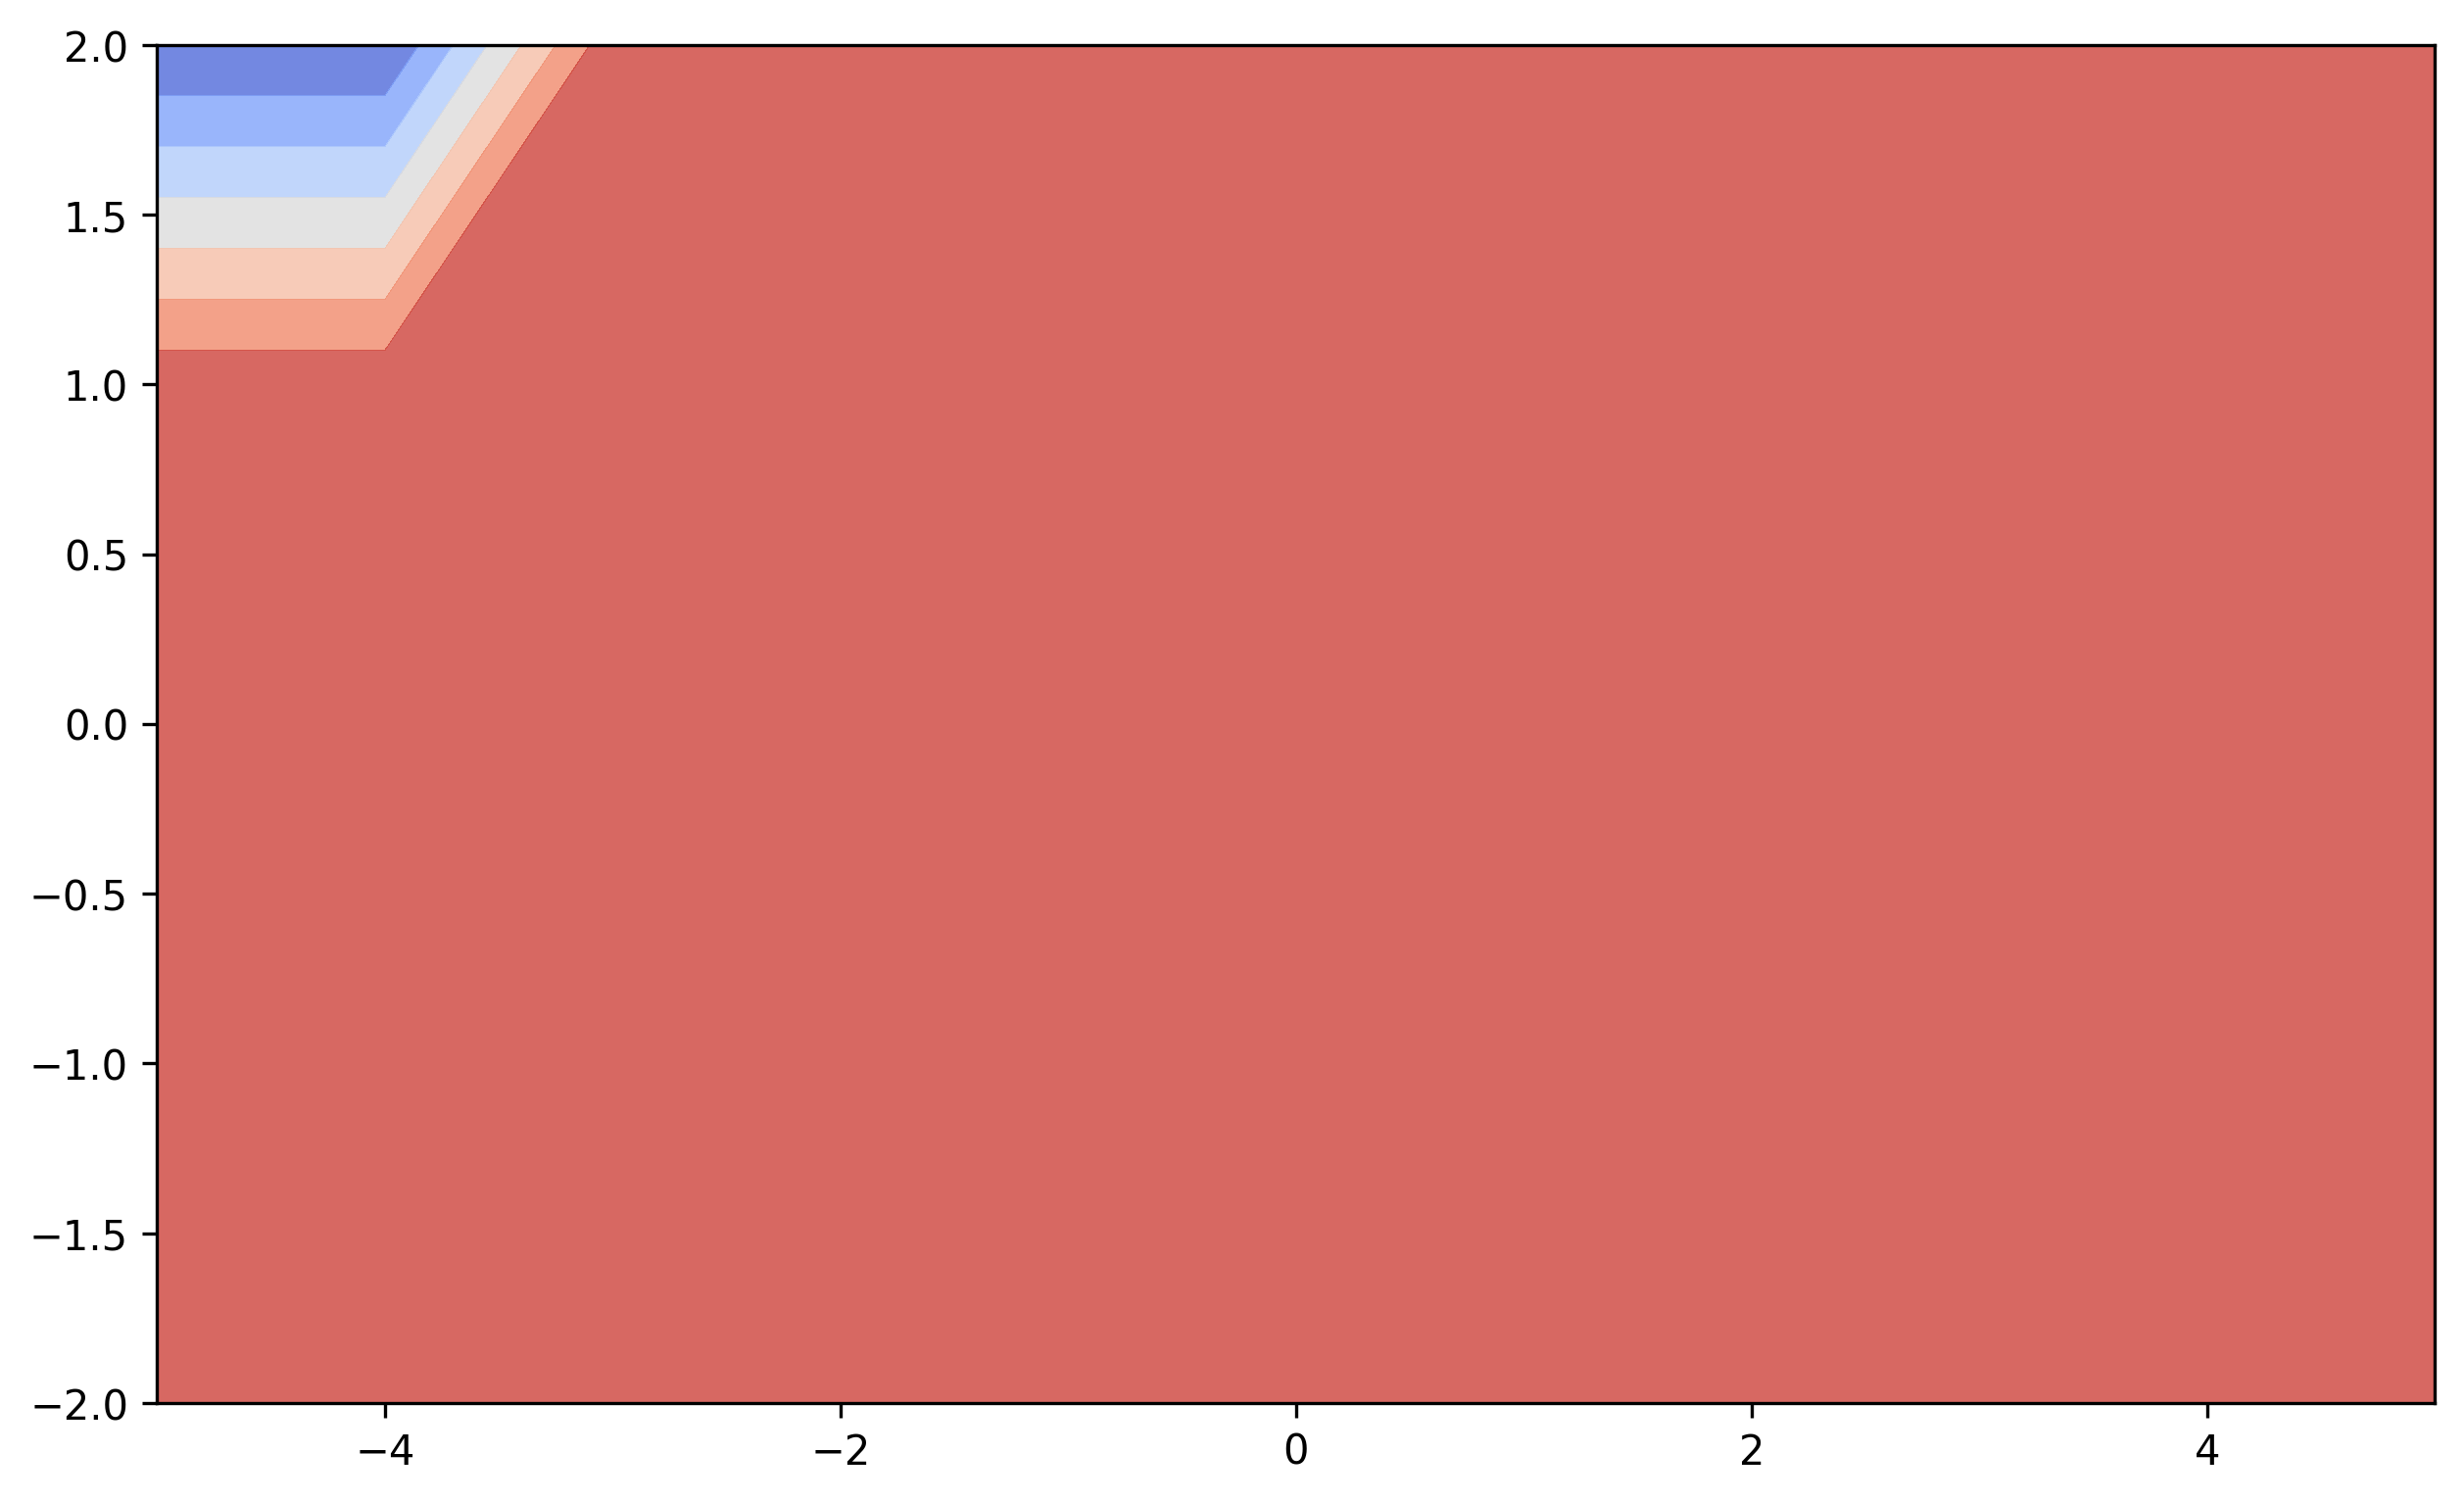

In [17]:
predictions=predictions.reshape(xx.shape) #per poter fare il contourplot

plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm, alpha=0.8)

Per la grandissima maggioranza dello spazio abbiao una predizione pari a 1.
Si possono capire i confini decisionali.

(24321, 2)
(24321,)


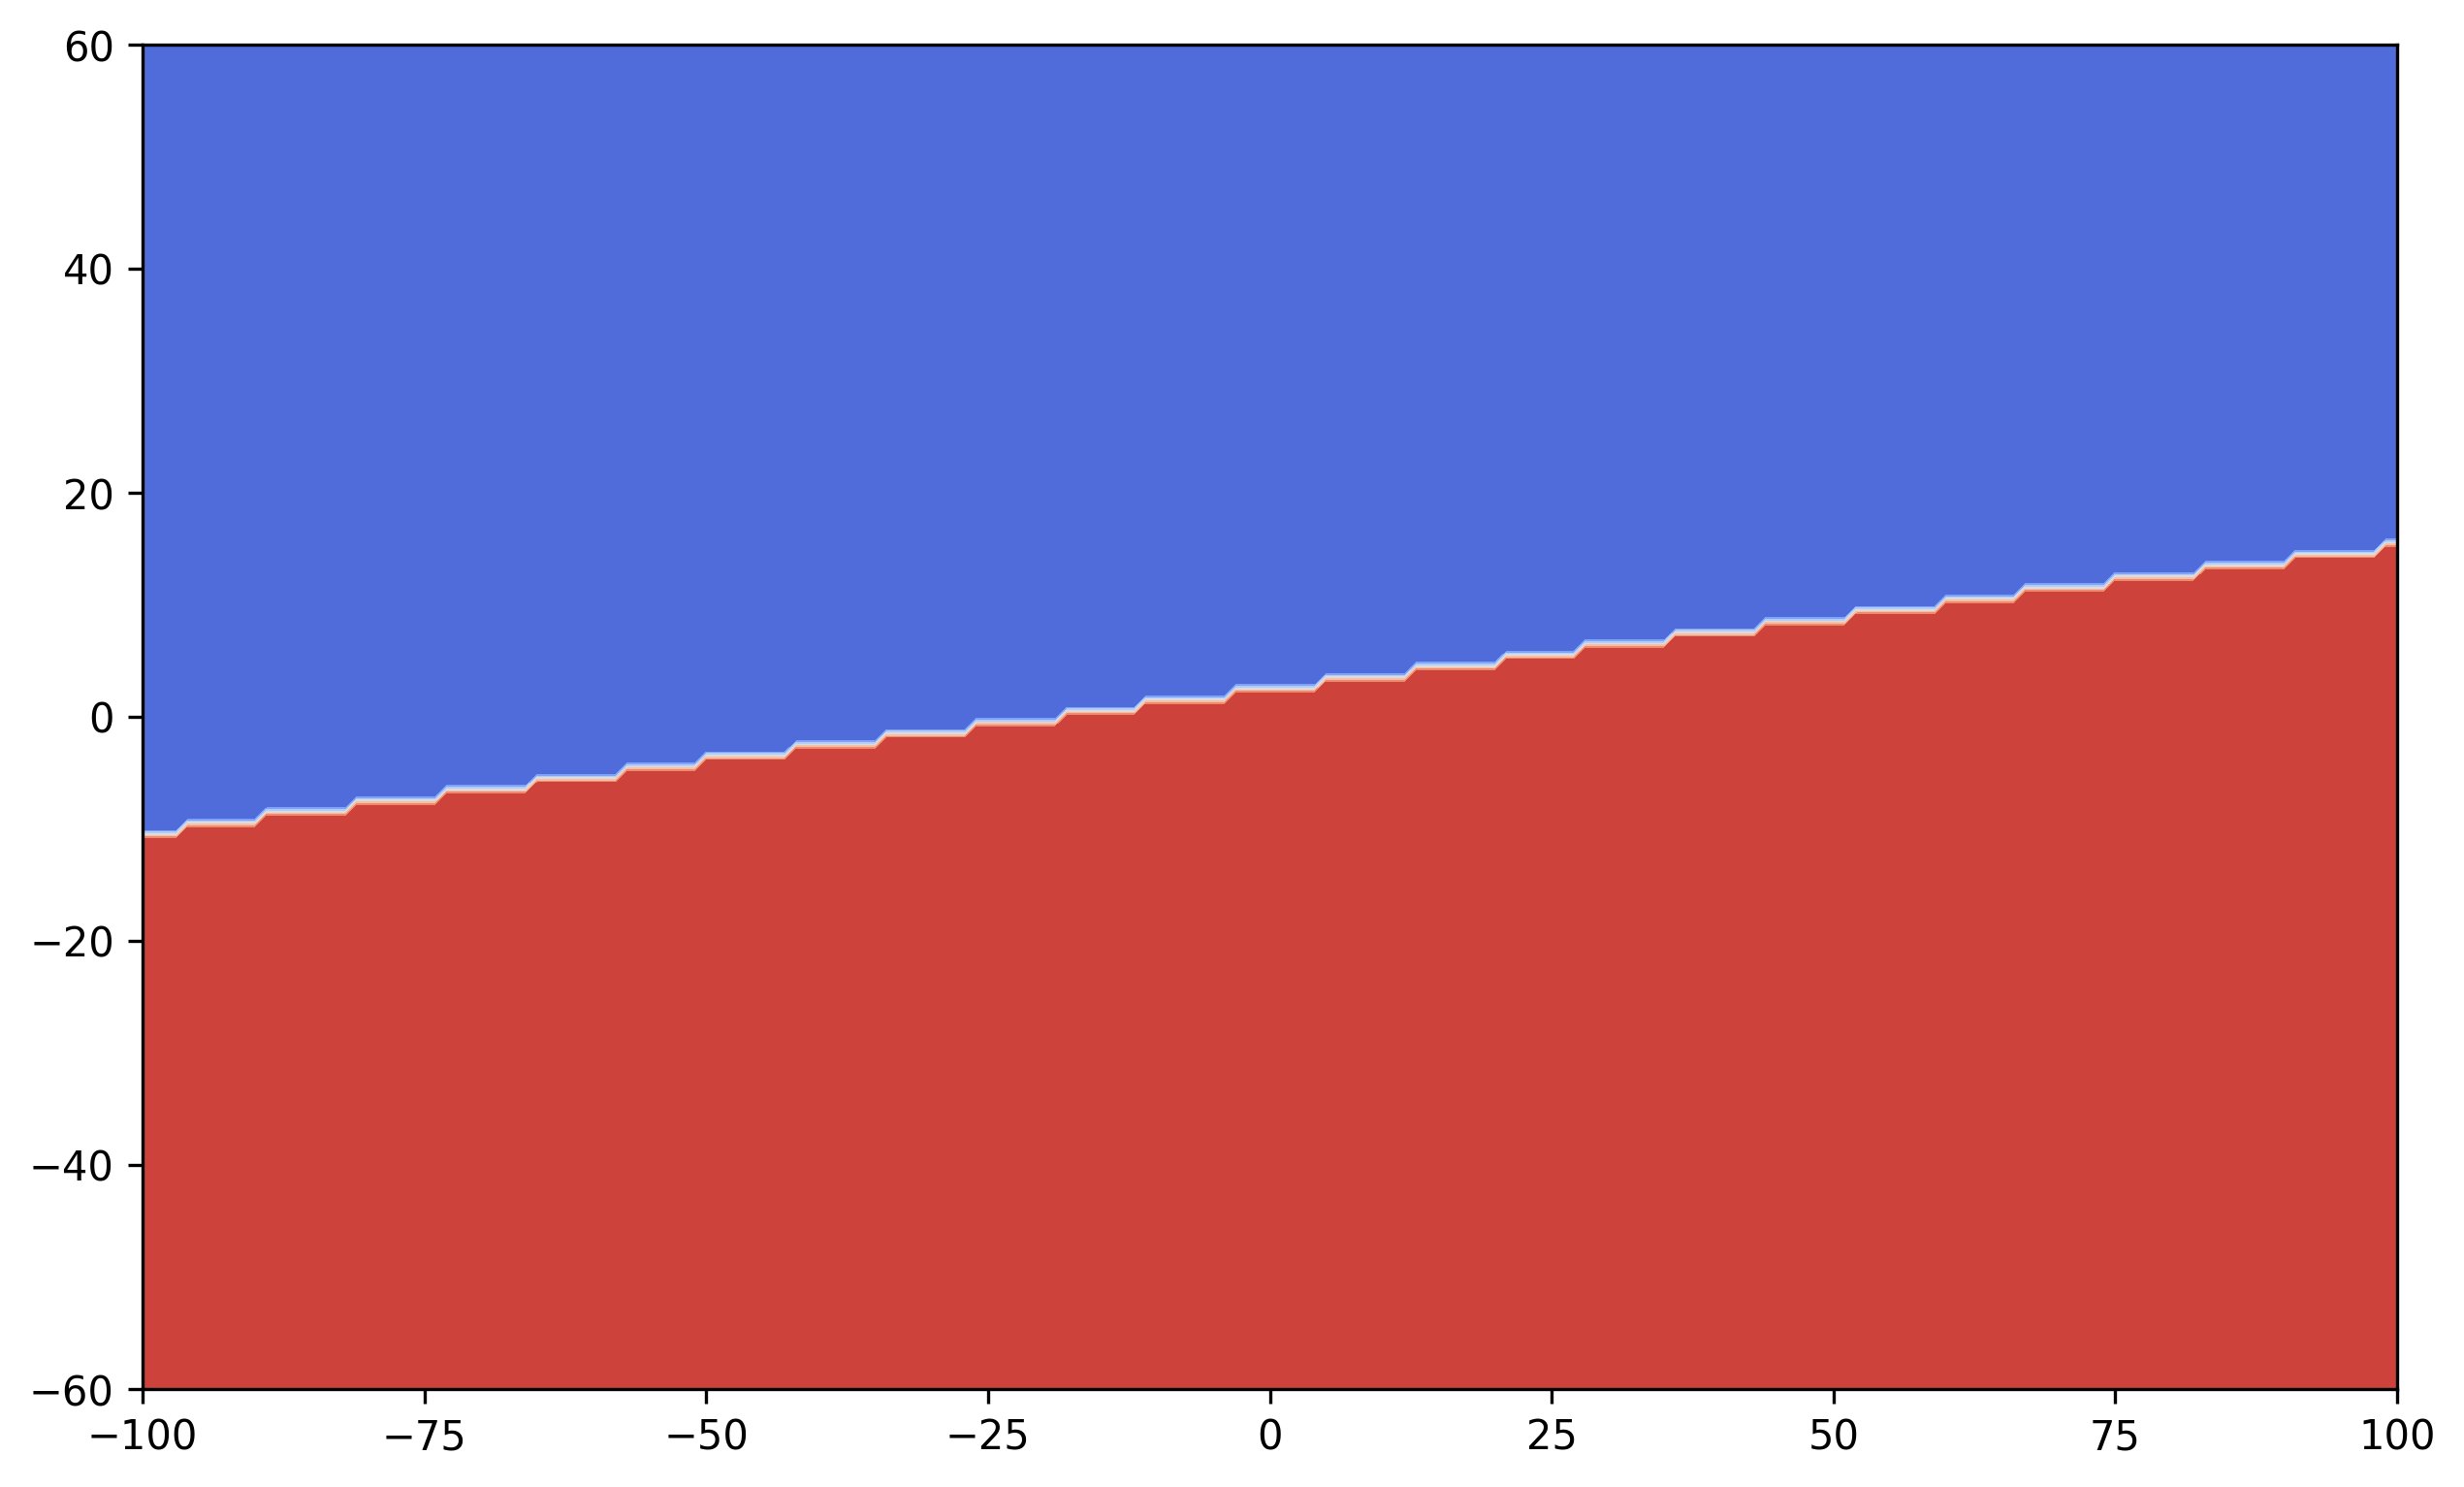

In [19]:
xx,yy= np.meshgrid(
    np.arange(-100,101,1),
    np.arange(-60,61,1)
)
batch=np.c_[xx.ravel(),yy.ravel()]
print(batch.shape)  

predictions=svc.predict(batch)
print(predictions.shape)

predictions=predictions.reshape(xx.shape)
plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)

In [29]:
x_min, x_max= X[:,0].min()-1, X[:,0].max()+1
y_min, y_max= X[:,1].min()-1, X[:,1].max()+1

xx,yy= np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max,h)
)

titles=[
    "SVC con kernel lineare",
    "LinearSVC (kernel lineare)",
    "SVC con kernel RBF",
    "SVC con kernel polinomiale di grado 3"
]

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    decision_function=clf.decision_function(X)
    #utlizzo questo metodo che mi da il valore esatto della funzione usata dal classficiatore per vedere quali sono i vettori di supporto
    support_vector_indices=np.where(np.abs(decision_function)<1+1e-15)[0] #aggiungo una tolleranza per l'utilizzo del float
    print(support_vector_indices)
    #[0] resitutisce solo gli indici

    support_vectors=X[support_vector_indices]
    print(f"Support vectors for {titles[i]}")
    print(support_vectors)

[ 3  5  7 22 29 34 37 38 40 44 54 56 65 67 74 80]
Support vectors for SVC con kernel lineare
[[ 0.08848433  2.32299086]
 [ 1.44193252  2.76754364]
 [ 3.97820955  2.37817845]
 [ 1.31570453  2.44067826]
 [ 2.3535057   2.22404956]
 [ 1.62011397  2.74692739]
 [ 1.98702592  2.61100638]
 [ 2.11567076  3.06896151]
 [-0.07228289  2.88376939]
 [ 0.88214412  2.84128485]
 [ 3.2460247   2.84942165]
 [ 2.85942078  2.95602827]
 [ 1.55723507  2.82719571]
 [ 2.84382807  3.32650945]
 [ 0.1631238   2.57750473]
 [ 1.19404184  2.80772861]]
[ 0  3  5  7 14 19 22 29 34 37 38 39 40 43 44 54 56 60 65 67 69 70 74 76
 77 80 84 92 99]
Support vectors for LinearSVC (kernel lineare)
[[ 4.21850347  2.23419161]
 [ 0.08848433  2.32299086]
 [ 1.44193252  2.76754364]
 [ 3.97820955  2.37817845]
 [ 1.78726415  1.70012006]
 [ 1.28535145  1.43691285]
 [ 1.31570453  2.44067826]
 [ 2.3535057   2.22404956]
 [ 1.62011397  2.74692739]
 [ 1.98702592  2.61100638]
 [ 2.11567076  3.06896151]
 [ 0.56400993  1.33705536]
 [-0.07228289

/var/folders/13/r2qtp3l16ngdy08zglqkfxyc0000gn/T/ipykernel_17006/2287371282.py:12: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, aplha=0.8)
/var/folders/13/r2qtp3l16ngdy08zglqkfxyc0000gn/T/ipykernel_17006/2287371282.py:12: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, aplha=0.8)
/var/folders/13/r2qtp3l16ngdy08zglqkfxyc0000gn/T/ipykernel_17006/2287371282.py:12: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, aplha=0.8)
/var/folders/13/r2qtp3l16ngdy08zglqkfxyc0000gn/T/ipykernel_17006/2287371282.py:12: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, aplha=0.8)


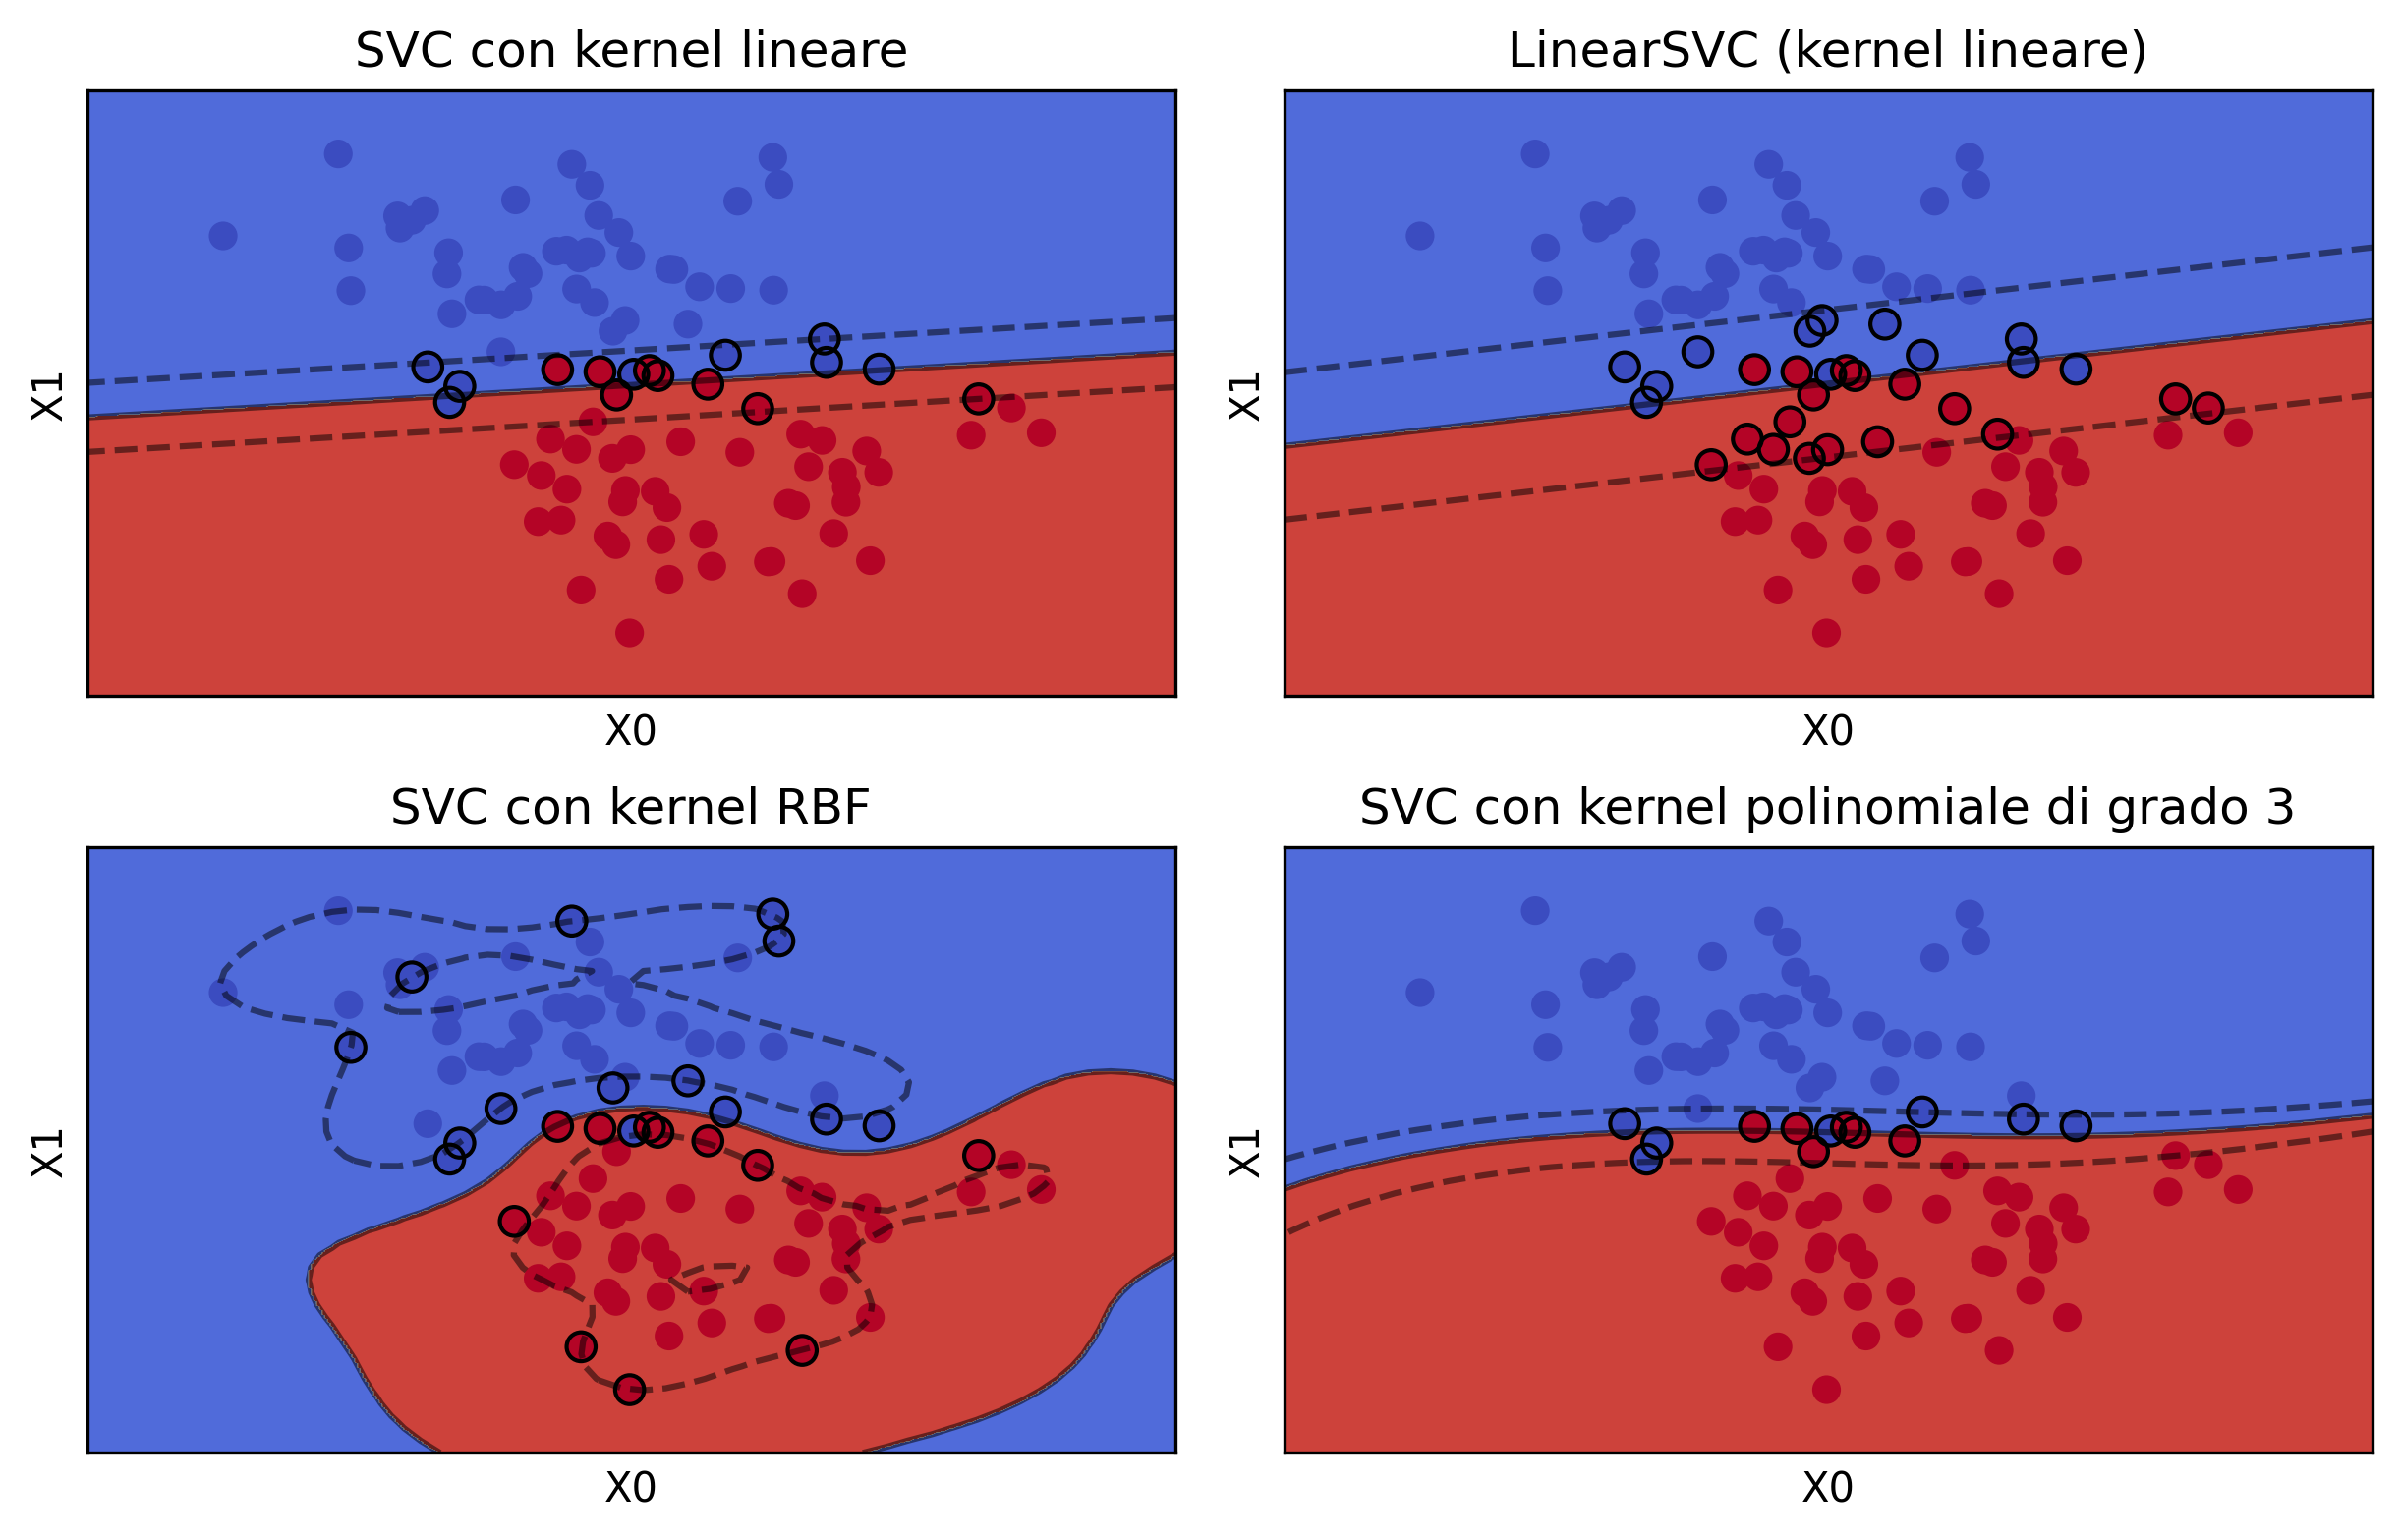

In [39]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    decision_function=clf.decision_function(X)
    support_vector_indices=np.where(np.abs(decision_function)<1+1e-15)[0] #aggiungo una tolleranza per l'utilizzo del float
    support_vectors=X[support_vector_indices]

    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.1, hspace=0.25)

    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)

    plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, aplha=0.8)
    plt.title(titles[i]) 

    plt.scatter(X[:,0], X[:,1], c=y ,cmap=plt.cm.coolwarm)

    ax=plt.gca() #prendiamo la figura corrente

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax, #micrografico che stiamo andando a disegnare per ogni iteraizone
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1,0,1], #indicazioni di quanto è largo il margine
        alpha=0.5,
        linestyles=["--","-","--"]
    )

    plt.scatter( #evidenziamo i vettori di supporto
        support_vectors[:,0],
        support_vectors[:,1],
        s=50,
        linewidths=1,
        edgecolors="k",
        facecolors="none"
    )

    #arricchiamo con le label
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())

